In [131]:
import torch

In [132]:

# Create a tensor of given shape
x = torch.randn(2, 3, 2)

# Create a tensor of given shape
y = torch.randn(2, 2, 4)

z = x @ y

print(z.shape)
print(z)

# Calculate the dot product of x and y
z = torch.bmm(x, y)
print(z.shape)

print(z)


torch.Size([2, 3, 4])
tensor([[[ 0.5412, -3.0263, -4.2704, -2.0479],
         [ 0.2815, -0.6985,  0.0980, -0.5578],
         [-0.2821,  2.0450,  3.4645,  1.3384]],

        [[-0.0923, -1.4342,  1.5379,  0.4003],
         [ 0.6209,  0.9610,  0.0315, -0.1894],
         [-0.8880, -0.9341, -0.5712,  0.1439]]])
torch.Size([2, 3, 4])
tensor([[[ 0.5412, -3.0263, -4.2704, -2.0479],
         [ 0.2815, -0.6985,  0.0980, -0.5578],
         [-0.2821,  2.0450,  3.4645,  1.3384]],

        [[-0.0923, -1.4342,  1.5379,  0.4003],
         [ 0.6209,  0.9610,  0.0315, -0.1894],
         [-0.8880, -0.9341, -0.5712,  0.1439]]])


In [133]:
# Create two tensors of the same shape (a, b, c)
a, b, c = 2, 3, 4  # Example dimensions
X = torch.randn(a, b, c)
Y = torch.randn(a, b, c)

# Compute Hadamard (element-wise) product
hadamard_product = X * Y

# Sum over all elements (generalized dot product)
GDT = hadamard_product.sum()

print("Generalized Dot Product (GDT):", GDT.item())  # Convert to scalar

GDT = torch.einsum('ijk,ijk->', X, Y)  # Summing over all elements
print("Generalized Dot Product (GDT):", GDT.item())

Generalized Dot Product (GDT): 8.406072616577148
Generalized Dot Product (GDT): 8.406073570251465


In [134]:
f = lambda x: x**2 - 1.5*x
df = lambda x: 2*x - 1.5

x = 1
def f_lin(h):
    # print(h, x)
    # print(f(x))
    # print(df(x))
    # print(h-x)
    return f(x) + df(x)*(h-x)

print(f(x + 0.001))
print(f_lin(x + 0.001))

-0.49949900000000014
-0.49950000000000006


In [135]:
x = 0.5
for i in range(10):
    h = 0.01    
    print(x)
    deriv = f_lin(x + h)
    print(deriv)
    x += deriv

0.5
-0.505
-0.0050000000000000044
-0.007574999999999994
-0.012575
0.003769130624999995
-0.008805869375000004
-0.0018897699895504324
-0.010695639364550437
0.0009439429609511673
-0.00975169640359927
-0.00047239373992511054
-0.01022409014352438
0.00023618543167899277
-0.009987904711845387
-0.00011814278593592561
-0.010106047497781313
5.908249274375402e-05
-0.010046965005037559
-2.9550286731964276e-05


In [141]:
import numpy as np
from torch import Tensor
from numpy.typing import NDArray
from typing import Dict, Any, List
from jaxtyping import Float

In [137]:
# Running a simple SDG in pytorch

def ls_sdg(
        X: Float[Tensor, "N D"],
        y: Float[Tensor, "N"],
        parameters: Dict[str, Any]
) -> Float[Tensor, "D"]:
    
    preds: List[Float[Tensor, "N"]] = []
    epochs: int = parameters.get("epochs")
    learning_rate: float = parameters.get("lr")
    W: Float[Tensor, "D"] = parameters.get("parameters") 
    
    print(f"W.shape: {W.shape}")
    print(f"X.shape: {X.shape}")
    print(f"y.shape: {y.shape}")
    # For loop - can we do this in a Tensor
    for epoch in range(epochs):
        # Compute forward
        try:
            pred: Float[Tensor, "N"] = X @ W
            loss: float = ((y - pred)**2).mean()
            print(f"Epoch {epoch} - Loss: {loss}")
            # Compute backward
            grad: Float[Tensor, "D"] = X.T @ (y - pred)
            W += learning_rate * grad
        except Exception as e:
            if epoch == 0:
                print(f"grad.shape: {grad.shape}")
                print(f"W.shape: {W.shape}")
                print(f"X.shape: {X.shape}")
                print(f"y.shape: {y.shape}")
                print(f"pred.shape: {pred.shape}")
                print(f"loss.shape: {loss.shape}")
                print(f"grad.shape: {grad.shape}")
            raise e
        preds.append(pred)
    return preds

torch.Size([500, 2])
torch.Size([500])


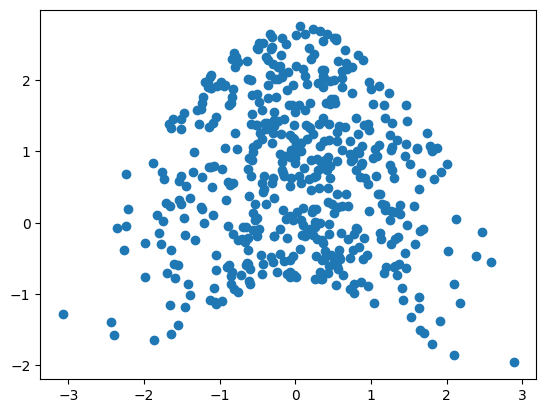

In [142]:
X: Float[Tensor, "N D"] = torch.randn(500, 2)
# Lets add a column of ones to the X tensor
# X = torch.cat([torch.ones(X.shape[0], 1), X], dim=1)
print(X.shape)

# We need to unpack the x1 and x2 into a single vector
x1: NDArray = X[:, 0]
x2: NDArray = X[:, 1]
y: Float[Tensor, "N"] = np.sin(x1) + np.cos(x2) + np.sin(0.5 * x1) * np.cos(0.5 * x2)
print(y.shape)
W: Float[Tensor, "D"] = torch.randn(X.shape[1])


parameters = {
    "epochs": 100,
    "lr": 0.001,
    "parameters": W
}

import matplotlib.pyplot as plt
# Create a plot of the data
plt.scatter(X[:, 1], y)

In [143]:
preds: List[Float[Tensor, "N"]] = ls_sdg(X, y, parameters)

W.shape: torch.Size([2])
X.shape: torch.Size([500, 2])
y.shape: torch.Size([500])
Epoch 0 - Loss: 6.815229415893555
Epoch 1 - Loss: 2.253800392150879
Epoch 2 - Loss: 1.0573564767837524
Epoch 3 - Loss: 0.7423010468482971
Epoch 4 - Loss: 0.6589748859405518
Epoch 5 - Loss: 0.6368300318717957
Epoch 6 - Loss: 0.6309135556221008
Epoch 7 - Loss: 0.6293237209320068
Epoch 8 - Loss: 0.6288939118385315
Epoch 9 - Loss: 0.6287769675254822
Epoch 10 - Loss: 0.6287449598312378
Epoch 11 - Loss: 0.6287360787391663
Epoch 12 - Loss: 0.6287336349487305
Epoch 13 - Loss: 0.6287329792976379
Epoch 14 - Loss: 0.6287328004837036
Epoch 15 - Loss: 0.6287327408790588
Epoch 16 - Loss: 0.6287326812744141
Epoch 17 - Loss: 0.6287327408790588
Epoch 18 - Loss: 0.6287326812744141
Epoch 19 - Loss: 0.6287326812744141
Epoch 20 - Loss: 0.6287326812744141
Epoch 21 - Loss: 0.6287326812744141
Epoch 22 - Loss: 0.6287326812744141
Epoch 23 - Loss: 0.6287326812744141
Epoch 24 - Loss: 0.6287326812744141
Epoch 25 - Loss: 0.62873274087

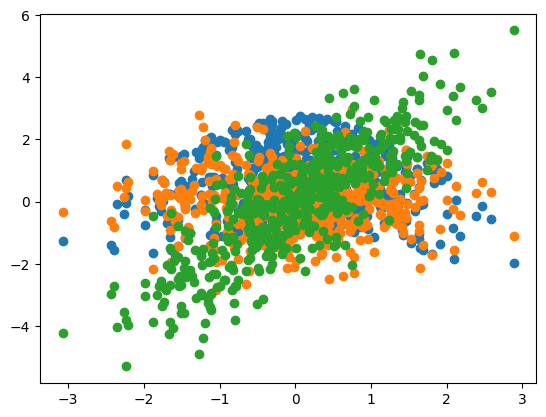

In [145]:
import matplotlib.pyplot as plt
# Create a plot of the data
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], preds[-1])
plt.scatter(X[:, 1], preds[0])
plt.show()
